In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
# Load Netflix dataset
netflix_data = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")

In [3]:
# Clean data (remove missing values)
netflix_data.dropna(inplace=True)

In [4]:
# Display the first few rows of the dataset
print("Head of the dataset:")
print(netflix_data.head())

Head of the dataset:
  show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA    93 min   
2  December 20, 2018          2011      R    78 min   
3  November 16, 2017          2009  PG-13    80 min   
4    January 1, 2020          2008  PG-13  

In [5]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(netflix_data.describe())


Summary statistics of the dataset:
       release_year
count   4808.000000
mean    2012.710275
std        9.521541
min     1942.000000
25%     2011.000000
50%     2016.000000
75%     2018.000000
max     2021.000000


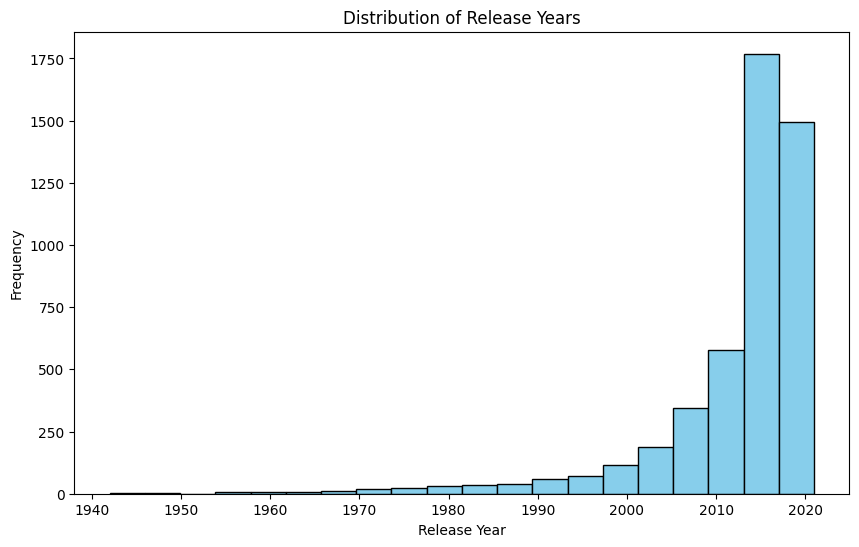

In [6]:
# Create a histogram of release years
plt.figure(figsize=(10, 6))
plt.hist(netflix_data['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

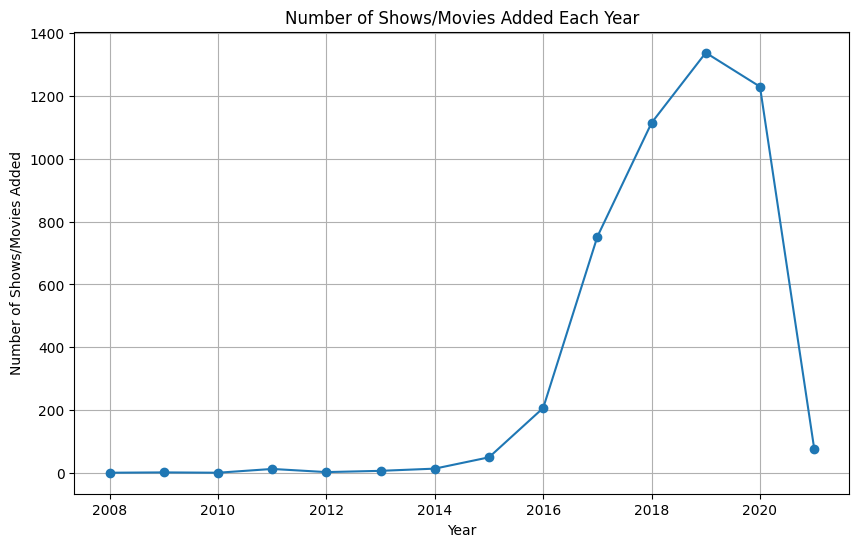

In [8]:
# Create a line plot of release years
plt.figure(figsize=(10, 6))

# Strip leading and trailing spaces from the date_added column
netflix_data['date_added'] = netflix_data['date_added'].str.strip()

# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Drop rows where date_added is null
netflix_data.dropna(subset=['date_added'], inplace=True)

# Extract year from date_added
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Count the number of shows/movies added each year
release_counts = netflix_data['year_added'].value_counts().sort_index()

# Plot the line plot
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-')
plt.title('Number of Shows/Movies Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows/Movies Added')
plt.grid(True)
plt.show()

In [11]:
# Extract numerical part from duration and convert to float
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)').astype(float)


In [12]:
# Perform K-Means clustering on release year and duration
X = netflix_data[['release_year', 'duration']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
netflix_data['cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


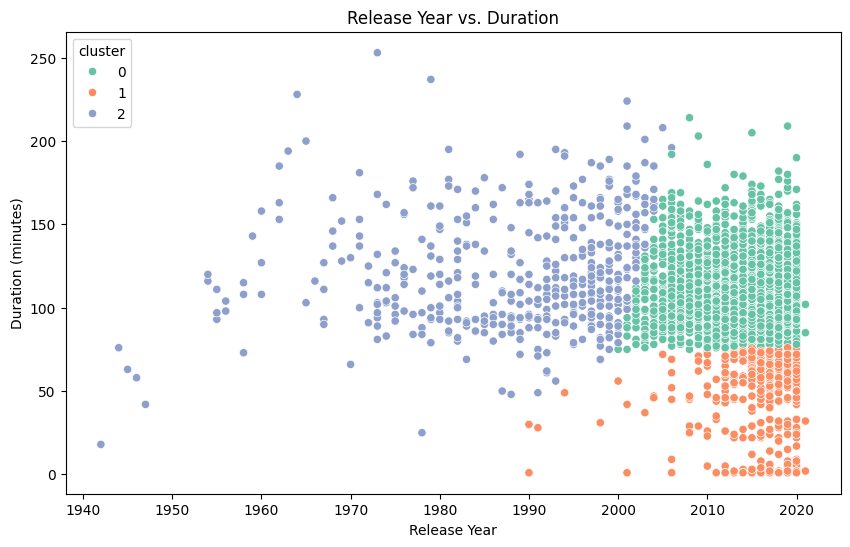

In [13]:
# Create a scatter plot of release year vs. duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', hue='cluster', data=netflix_data, palette='Set2')
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

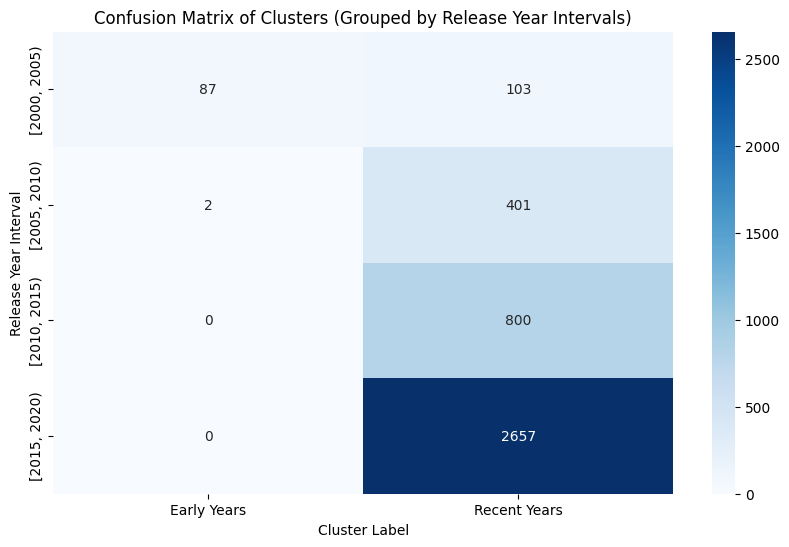

In [20]:
# Calculate the average release year for each cluster
cluster_avg_release_year = netflix_data.groupby('cluster')['release_year'].mean()

# Calculate the overall average release year
overall_avg_release_year = netflix_data['release_year'].mean()

# Assign labels to the clusters based on the average release year
cluster_labels = []
for avg_year in cluster_avg_release_year:
    if avg_year < overall_avg_release_year:
        cluster_labels.append('Early Years')
    elif avg_year > overall_avg_release_year:
        cluster_labels.append('Recent Years')
    else:
        cluster_labels.append('Average Years')

# Add cluster labels to the DataFrame
netflix_data['cluster_label'] = netflix_data['cluster'].map({0: cluster_labels[0], 1: cluster_labels[1], 2: cluster_labels[2]})

# Create a confusion matrix of the clusters based on release year intervals
confusion_matrix = pd.crosstab(netflix_data['release_year_interval'], netflix_data['cluster_label'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Clusters (Grouped by Release Year Intervals)')
plt.xlabel('Cluster Label')
plt.ylabel('Release Year Interval')
plt.show()


In [17]:
# Perform linear regression on release year and duration
X_regression = netflix_data['release_year'].values.reshape(-1, 1)
y_regression = netflix_data['duration'].values
regression_model = LinearRegression()
regression_model.fit(X_regression, y_regression)

LinearRegression()

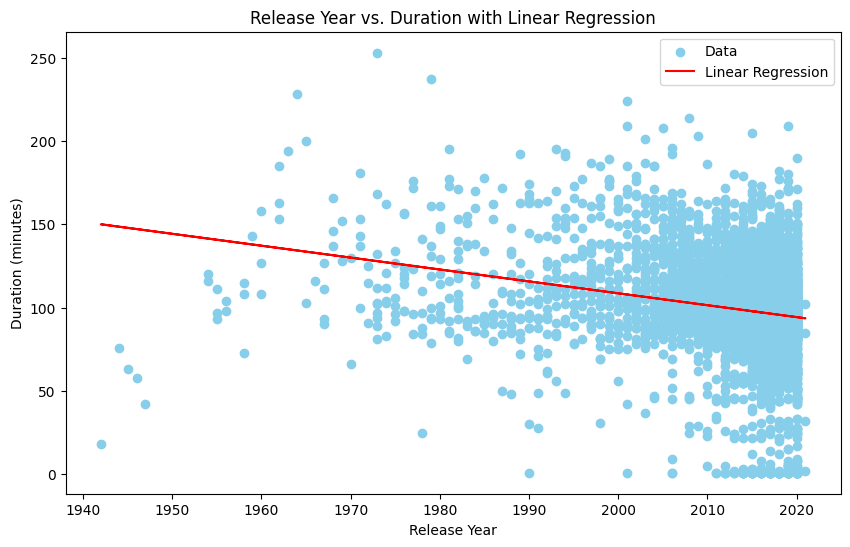

In [18]:
# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(netflix_data['release_year'], netflix_data['duration'], color='skyblue', label='Data')
plt.plot(netflix_data['release_year'], regression_model.predict(X_regression), color='red', label='Linear Regression')
plt.title('Release Year vs. Duration with Linear Regression')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.show()